In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('weight-height.csv')
df.head()

,Height_cm,Weight_kg
0,163,85
1,199,100
2,158,78
3,175,85
4,151,68


Text(0, 0.5, 'Weight (in kg)')

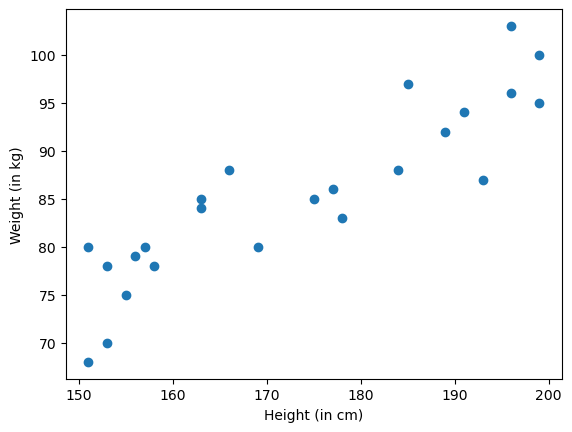

In [3]:
# scatter plot
plt.scatter(df['Height_cm'],df['Weight_kg'])
plt.xlabel('Height (in cm)')
plt.ylabel('Weight (in kg)')

In [4]:
# correlation
df.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.890846
Weight_kg,0.890846,1.000000


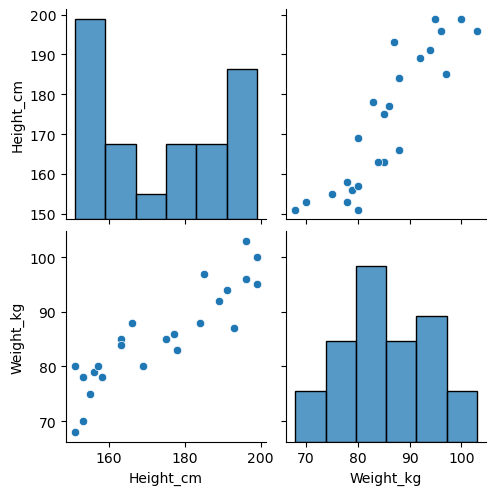

In [5]:
# Seaborn for Visulaization
import seaborn as sns
sns.pairplot(df)

In [6]:
# independent and dependent features
X=df[['Height_cm']]     # independent features should always be in the form of a DataFrame or in 2-D
y=df['Weight_kg']       # dependent features scan be 1-D or in the form of Series

In [7]:
np.array(X).shape

(24, 1)

In [8]:
np.array(y).shape

(24,)

In [9]:
# dividing into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(18, 1) (6, 1) (18,) (6,)


In [11]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train

array([[-0.57808325],
       [ 1.72006365],
       [ 1.20936434],
       [-0.19505876],
       [-0.89727032],
       [ 0.76250244],
       [ 0.82633986],
       [ 0.18796572],
       [-1.34413221],
       [-1.21645738],
       [ 1.08168951],
       [-1.08878256],
       [ 0.37947796],
       [ 1.52855141],
       [-0.96110773],
       [-0.38657101],
       [-1.34413221],
       [ 0.31564055]])

In [13]:
X_test

array([[-1.02494514],
       [ 1.72006365],
       [-0.57808325],
       [-1.21645738],
       [ 1.52855141],
       [ 1.33703917]])

In [14]:
# applying simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [15]:
print(f"Slope={regression.coef_}\nIntercept={regression.intercept_}")

Slope=[8.53983032]
Intercept=85.05555555555556


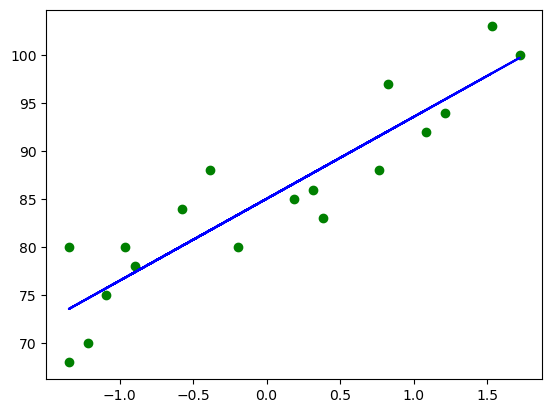

In [16]:
# plotting line of best fit for training
plt.scatter(X_train,y_train,color="Green")
plt.plot(X_train,regression.predict(X_train),color="Blue")

In [17]:
# prediction of test data
'''
y_pred=intercept+slope(X_test)
y_pred=85.05555555555556+8.53983032(X_test)
'''
y_pred=regression.predict(X_test)
y_pred

array([76.30269794, 99.74460726, 80.11882272, 74.6672159 , 98.10912521,
       96.47364317])

In [18]:
# performance meteics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
mse=mean_squared_error(y_test, y_pred)      # mse is a bit high as there are a bit of outliers in the dataset
mae=mean_absolute_error(y_test, y_pred)
rmse=root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error={mse}\nMean Absolute Error={mae}\nRoot Mean Squared Error={rmse}")


Mean Squared Error=26.486400329930643
Mean Absolute Error=4.539773179883859
Root Mean Squared Error=5.1464939842508945


In [19]:
from sklearn.metrics import r2_score
print(f"Root Squared (R2) Score={r2_score(y_test,y_pred)}")

Root Squared (R2) Score=0.4582327205241461


In [21]:
# OLS Linear Regression
import statsmodels.api as sm

In [24]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)

In [25]:
print(prediction)

[ -8.75285761  14.6890517   -4.93673284 -10.38833966  13.05356966
  11.41808761]


In [26]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Weight_kg   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.048
Method:                 Least Squares   F-statistic:                             0.1710
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                       0.684
Time:                        21:20:13   Log-Likelihood:                         -105.54
No. Observations:                  18   AIC:                                      213.1
Df Residuals:                      17   BIC:                                      214.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [31]:
# making predictions 😃
regression.predict(scaler.transform([[172]]))     # tp get correct predictions we use scaler.transform

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([85.02526885])